## Install Libs

In [1]:
%pip install -r requirements.txt
%pip install .

Note: you may need to restart the kernel to use updated packages.
Processing c:\users\msc_seiot_1\mapf_g2rl-main
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for g2rl: filename=g2rl-0.1.0-py3-none-any.whl size=11273 sha256=58d73b516bd60d80fd7fffac3302c2942f647d0b36828b8446ff0bb57329e07a
  Stored in directory: c:\users\msc_seiot_1\appdata\local\pip\cache\wheels\6e\fe\98\dc300e2da3a39023b223595ca601b09d42111dad2bdfe3d890
Successfully built g2rl
  Attempting uninstall: g2rl
    Found existing installation: g2rl 0.1.0
    Not uninstalling g2rl at c:\users\msc_seiot_1\mapf_g2rl, outside environment c:\Users\MSc_SEIoT_1\MAPF_G2RL-main\.venv38_1
    Can't uninstall 'g2rl'. No files were found to uninstall.
Note: you may need to restart the kernel to use updated packages.


## Train

In [170]:
import sys
import os

# 修改为你想用的 train.py 所在路径的上一级目录
custom_path = r"C:/Users/MSc_SEIoT_1/MAPF_G2RL-main - train"

# 加入路径（必须在 import g2rl 前面）
if custom_path not in sys.path:
    sys.path.insert(0, custom_path)

# # 测试是否导入的是这个版本
import g2rl.train_new_1
import inspect
print("✅ 当前使用的 train.py 是：", inspect.getfile(g2rl.train_new_1))



✅ 当前使用的 train.py 是： C:/Users/MSc_SEIoT_1/MAPF_G2RL-main - train\g2rl\train_new_1.py


In [171]:
from pathlib import Path
from datetime import datetime
import sys
import os
sys.path.append(os.getcwd())
import numpy as np
from torch.utils.tensorboard import SummaryWriter
from tqdm.notebook import tqdm

from g2rl.agent import G2RLAgent
from g2rl.environment import G2RLEnv
from g2rl import DDQNAgent, CRNNModel, moving_cost, detour_percentage, train_new_1

In [11]:
import torch
print("Torch version:", torch.__version__)
print("CUDA available:", torch.cuda.is_available())
print("CUDA version (from build):", torch.version.cuda)
print("Device count:", torch.cuda.device_count())
print("Device name:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "N/A")



Torch version: 2.4.1+cu118
CUDA available: True
CUDA version (from build): 11.8
Device count: 1
Device name: NVIDIA GeForce RTX 3060


In [4]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
map_settings = {
    'regular_1': {
        'size': 50,
        'density': 0.392,
        'num_agents': 4,
    },
    'regular_2': {
        'size': 50,
        'density': 0.452,
        'num_agents': 6,
    },
    'random_1': {
        'size': 50,
        'density': 0.15,
        'num_agents': 6,
    },
    'random_2': {
        'size': 50,
        'density': 0.25,
        'num_agents': 7,
    },
    'free_1': {
        'size': 50,
        'density': 0,
        'num_agents': 11,
    },
    'free_2': {
        'size': 50,
        'density': 0.1,
        'num_agents': 15,
    },
}
# map_probs = [1, 1, 1, 1, 1, 1]
# model = CRNNModel(num_kernels=None).to(device)
model = CRNNModel().to(device)  # 不要手动传 None
print(f"✅ 当前设备: {device}, 模型设备: {next(model.parameters()).device}")
# model.load_state_dict(torch.load('models/16-07-24-05-2024.pt', map_location=device))

✅ 当前设备: cuda, 模型设备: cuda:0


In [5]:
# print(map_settings)
# selected_map_config = map_settings['regular_1']
# print(selected_map_config)
# selected_map_config_wrapped = {
#     'map1': selected_map_config
# }

In [ ]:
# import torch

# print("当前设备：", torch.cuda.current_device() if torch.cuda.is_available() else "CPU")
# print("是否可用GPU：", torch.cuda.is_available())
# print("GPU名称：", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "N/A")
# print("PyTorch使用的设备：", torch.device("cuda" if torch.cuda.is_available() else "cpu"))



当前设备： 0
是否可用GPU： True
GPU名称： NVIDIA GeForce RTX 3060
PyTorch使用的设备： cuda


In [ ]:
trained_agent = train(
    model,
    map_settings=map_settings,
    map_probs = None,  # train 函数中会自动等权重处理
    num_episodes=500,
    batch_size=32,
    replay_buffer_size=500,
    decay_range=5_000,
    log_dir='logs',
    device=device,
    lr=1e-4
)

In [ ]:
torch.save(trained_agent.target_network.state_dict(), 'models/latest_model.pt')

In [ ]:
trained_agent.target_network

## Test

### Basic performance

In [173]:
from IPython.display import SVG, display

In [172]:
device = 'cuda'
map_settings = {
    'regular': {
        'size': 48,
        'density': 0.392,
        'num_agents': 4,
    },
    'random': {
        'size': 48,
        'density': 0.15,
        'num_agents': 6,
    },
    'free': {
        'size': 48,
        'density': 0,
        'num_agents': 11,
    },
    'test': {
        'size': 48,
        'density': 0.1,
        'num_agents': 5,
    }
}

In [174]:
env = G2RLEnv(**map_settings['test'], max_episode_steps=2000)
# model = CRNNModel(lstm_input_size=1024)
# ckpt = r"C:/Users/MSc_SEIoT_1/MAPF_G2RL-main - train/models/best_model.pt"
# state = torch.load(ckpt, map_location=device)
# model.load_state_dict(state)

# model.load_state_dict(torch.load('best_model_1.pt', map_location=device))

ckpt = r"C:/Users/MSc_SEIoT_1/MAPF_G2RL-main - train/models/best_model_1.pt"
state = torch.load(ckpt, map_location=device)

# 从 checkpoint 里推断 input_size
w_ih = state["lstm.weight_ih_l0"]   # shape: (4*hidden_size, input_size)
input_size = w_ih.shape[1]          # = 576
hidden_size = w_ih.shape[0] // 4    # = 128 (只是确认用，不需要传参)

print(f"👉 inferred LSTM input_size={input_size}, hidden_size={hidden_size}")

# 只传 input_size
model = CRNNModel(lstm_input_size=input_size).to(device)

# # 严格加载
# model.load_state_dict(state)

print("✅ 模型已正确加载")


missing, unexpected = model.load_state_dict(state, strict=False)
print("loaded with strict=False; missing:", missing, "unexpected:", unexpected)
# model.load_state_dict(torch.load('best_model_1.pt', map_location=device))


agent = DDQNAgent(
    model,
    action_space=env.get_action_space(),

    device=device)
agent.epsilon = 0

👉 inferred LSTM input_size=576, hidden_size=128
✅ 模型已正确加载
loaded with strict=False; missing: [] unexpected: []


C:\Users\MSc_SEIoT_1\AppData\Local\Temp\ipykernel_20312\2510568240.py:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(ckpt, map_location=device)


In [22]:
# ====== 基础导入 ======
from collections import deque
from pathlib import Path
import itertools, math, sys, os, time, json, random
import numpy as np
import torch
import torch.nn as nn

# ====== 你的工程根目录 ======
project_root = r"C:/Users/MSc_SEIoT_1/MAPF_G2RL-main - train"  # <- 改成你的
if project_root not in sys.path:
    sys.path.insert(0, project_root)

# ====== 工程内模块 ======
from pogema import AStarAgent
from g2rl.environment import G2RLEnv
from g2rl.network import CRNNModel   # 直接用模型做前向 (不依赖 DDQNAgent.act)

# ====== 设备 ======
device = "cuda" if torch.cuda.is_available() else "cpu"
print("device =", device)

# ====== 全局调参区 ======
# 之前通道探针的结论： (障碍=1, 自车=0, 目标=3, 其他=2)
USE_CHANNELS = (1, 0, 3, 2)

# 你目前想试的动作映射（网络动作 -> 环境动作）
# 可改为你之前的候选：(0,2,1,3,4) / (0,1,3,4,1) / (0,4,1,3,4) / ...
ACTION_MAP = (0, 1, 3, 4, 1)

# 是否尝试“硬救援”（卡住时临时用A*接管几步）
USE_RESCUE = True
PATIENCE = 6      # 卡住多少步触发救援
RESCUE_LEN = 4    # 每次救援步数

# 可选：权重路径（若没有就跳过加载，使用随机初始化）
WEIGHT_PATH = None  # 例如 r"C:/path/to/best_model_1.pt"

# 打印对齐辅助
def p(*args, **kw):
    print(*args, **kw, flush=True)


device = cuda


In [23]:
def bfs_dist(grid01, start, goal):
    """grid01: 0可走,1障碍；返回最短步数或 None（不可达）"""
    H, W = grid01.shape
    sy, sx = start; gy, gx = goal
    if not (0<=sy<H and 0<=sx<W and 0<=gy<H and 0<=gx<W):
        return None
    if grid01[sy, sx] or grid01[gy, gx]:
        return None
    q = deque()
    q.append((sy, sx, 0))
    seen = {(sy, sx)}
    for_step = ((1,0),(-1,0),(0,1),(0,-1))
    while q:
        y, x, d = q.popleft()
        if (y, x) == (gy, gx):
            return d
        for dy, dx in for_step:
            ny, nx = y+dy, x+dx
            if 0<=ny<H and 0<=nx<W and grid01[ny,nx]==0 and (ny,nx) not in seen:
                seen.add((ny,nx))
                q.append((ny,nx,d+1))
    return None

def sample_static_map(size, density, num_agents, seed=2025, max_tries=400):
    """
    采样一张“静态可达”的随机图：
      - grid 按 density 采样
      - 给每个 agent 采样 start/goal（起终至少曼哈顿>=5）
      - 用 BFS 检查 start->goal 全可达
    """
    rng = np.random.RandomState(seed)
    dens = float(density)
    for attempt in range(max_tries):
        # 尝试多次采不到就逐步降低密度，增大可达率
        if attempt in (150, 300):
            dens = max(0.0, dens - 0.05)

        grid = (rng.rand(size, size) < dens).astype(np.uint8)  # 1=障碍
        free = np.argwhere(grid==0)
        if len(free) < 2*num_agents:
            continue
        rng.shuffle(free)
        starts = [tuple(map(int, p)) for p in free[:num_agents]]
        goals  = [tuple(map(int, p)) for p in free[num_agents:2*num_agents]]

        # 起终至少曼哈顿>=5，避免太近
        tail = list(map(tuple, free[2*num_agents:]))
        for i in range(num_agents):
            sy, sx = starts[i]; gy, gx = goals[i]
            if abs(sy-gy)+abs(sx-gx) < 5:
                # 从剩余空格里找一个够远的
                for qy, qx in tail:
                    if abs(qy-sy)+abs(qx-sx) >= 5 and grid[qy,qx]==0:
                        goals[i] = (int(qy), int(qx))
                        break

        # 静态可达检查
        ok = True
        for s, g in zip(starts, goals):
            if bfs_dist(grid, s, g) is None:
                ok=False; break
        if ok:
            return {
                "size": int(size),
                "density": float(dens),
                "num_agents": int(num_agents),
                "grid": grid.tolist(),
                "starts": [list(p) for p in starts],
                "goals":  [list(p) for p in goals],
                "seed": int(seed)
            }
    raise RuntimeError("静态地图采样失败：请降低 density 或减少 num_agents 或增大 max_tries")


In [24]:
def build_env_from_static(spec, max_episode_steps=2000):
    env = G2RLEnv(size=spec["size"], density=spec["density"], num_agents=spec["num_agents"],
                  max_episode_steps=max_episode_steps)
    env.grid   = (np.array(spec["grid"])>0).astype(np.uint8)
    env.starts = spec["starts"]
    env.goals  = spec["goals"]
    return env

def build_single_agent_env_from_static(spec, idx=0, max_episode_steps=2000):
    """把多人的静态图切一份“单人版本”出来，便于单体调试。"""
    single_spec = dict(spec)
    single_spec = {
        "size": spec["size"],
        "density": spec["density"],
        "num_agents": 1,
        "grid": spec["grid"],
        "starts": [spec["starts"][idx]],
        "goals":  [spec["goals"][idx]],
        "seed": spec.get("seed", 0)
    }
    return build_env_from_static(single_spec, max_episode_steps)

def _unpack_step(out):
    """兼容不同 gym 版本的 env.step 返回值"""
    if len(out)==5: return out
    if len(out)==4:
        obs, rew, done, info = out
        # old gym: done 是 bool 或 list；我们映射成 term、trunc
        term = done
        trunc = False
        return obs, rew, term, trunc, info
    raise RuntimeError(f"env.step 返回 {len(out)} 元组（不支持）")


In [25]:
def test_astar_all(env, max_steps=2000, verbose_every=100):
    """多人环境下，全体 A* 能否成功"""
    obs, _ = env.reset()
    agents = [AStarAgent() for _ in range(env.num_agents)]
    # 若终点被 env 动态改动，我们每步都以 env.goals 为准
    fixed_goals = [tuple(map(int, g)) for g in env.goals]
    done_mask = [False]*env.num_agents

    for t in range(max_steps):
        if verbose_every and (t % verbose_every == 0):
            p(f"[A*] step={t} done={sum(done_mask)}/{env.num_agents}")
        actions = []
        for i, o in enumerate(obs):
            pos = tuple(map(int, o['global_xy']))
            # 到达就 stay
            if not done_mask[i] and pos == fixed_goals[i]:
                done_mask[i] = True
            actions.append(0 if done_mask[i] else agents[i].act(o))  # 0=stay
        obs, _, term, trunc, _ = _unpack_step(env.step(actions))
        if all(done_mask):
            p(f"✅ 全体 A* 成功：step={t}")
            return True
    p("❌ 全体 A* 未完成")
    return False

def obs_to_tensor_for_crnn(state, device, use_channels):
    """把 obs 转成 CRNN 需要的 [1,T,H,W,C]；并重排通道为 use_channels"""
    V = np.asarray(state['view_cache'], dtype=np.float32)  # [T,H,W,C]
    V = V[..., list(use_channels)]
    x = torch.from_numpy(V).unsqueeze(0).to(device)         # [1,T,H,W,C]
    return x

def model_pick_action(obs_i, model, device, use_channels, action_map):
    """
    用 CRNNModel 直接前向，拿到网络动作（argmax），再映射成环境动作。
    action_map: 长度=5 的 tuple/list，索引=网络动作，值=环境动作
    """
    x = obs_to_tensor_for_crnn(obs_i, device, use_channels)  # [1,T,H,W,C]
    x = x.permute(0, 4, 1, 2, 3)                             # -> [B,C,T,H,W]
    with torch.no_grad():
        q = model(x)                                         # [1,5]
    net_a = int(torch.argmax(q, dim=1).item())
    env_a = int(action_map[net_a])
    return env_a, net_a, q.squeeze(0).tolist()


In [26]:
def rollout_model_only(env, model, device, use_channels, action_map, max_steps=2000, log_every=25):
    obs, _ = env.reset()
    fixed_goal = tuple(map(int, env.goals[0]))
    for t in range(max_steps):
        pos = tuple(map(int, obs[0]['global_xy']))
        if t % log_every == 0:
            d = abs(pos[0]-fixed_goal[0]) + abs(pos[1]-fixed_goal[1])
            a_env, a_net, q = model_pick_action(obs[0], model, device, use_channels, action_map)
            p(f"[t={t}] pos={pos} goal={fixed_goal} d={d} | net_a={a_net} env_a={a_env} | q={q}")

        # 仅 0 号 agent 用模型，其他 agent（如果有）先全部 stay
        actions = [0]*env.num_agents
        a_env, _, _ = model_pick_action(obs[0], model, device, use_channels, action_map)
        actions[0] = a_env

        obs, _, term, trunc, _ = _unpack_step(env.step(actions))
        # 把目标“钉住”（如果你的 env 会动 goal）
        env.goals[0] = list(fixed_goal)
        if isinstance(term, (list, tuple, np.ndarray)):
            if term[0]: 
                p(f"🎯 到达（t={t}）"); return True
        else:
            if term: 
                p(f"🎯 到达（t={t}）"); return True
    p("⌛ 用尽步数仍未到达。"); return False

def rollout_with_hard_rescue(env, model, device, use_channels, action_map,
                             target_idx=0, max_steps=2000, patience=6, rescue_len=4, log_every=25):
    """
    若卡住（曼哈顿距离多步不降），临时用 A* 接管 rescue_len 步。
    """
    obs, _ = env.reset()
    goal = tuple(map(int, env.goals[target_idx]))
    teacher = AStarAgent()

    last_d = None
    stuck = 0
    rescue_ticks = 0

    for t in range(max_steps):
        pos = tuple(map(int, obs[target_idx]['global_xy']))
        d = abs(pos[0]-goal[0]) + abs(pos[1]-goal[1])

        if t % log_every == 0:
            a_env, a_net, q = model_pick_action(obs[target_idx], model, device, use_channels, action_map)
            p(f"[t={t}] pos={pos} goal={goal} d={d} | net_a={a_net} env_a={a_env} | q={q}")

        # 到了就收工
        if pos == goal:
            p(f"🎯 到达（t={t}）"); return True

        # 卡住测度
        if last_d is None or d < last_d:
            stuck = 0
        else:
            stuck += 1
        last_d = d

        actions = [0]*env.num_agents
        if rescue_ticks > 0 or stuck >= patience:
            # —— 救援：A* 接管 target_idx —— 
            a = int(teacher.act(obs[target_idx]))
            rescue_ticks = rescue_len if rescue_ticks==0 else rescue_ticks-1
            actions[target_idx] = a
        else:
            # —— 正常：模型动作 —— 
            a_env, _, _ = model_pick_action(obs[target_idx], model, device, use_channels, action_map)
            actions[target_idx] = a_env

        # 其它 agent 简化为 stay（避免干扰，先看单体是否能走）
        for i in range(env.num_agents):
            if i != target_idx:
                actions[i] = 0  # stay

        obs, _, term, trunc, _ = _unpack_step(env.step(actions))
        env.goals[target_idx] = list(goal)

def safe_action_space(env):
    """
    从环境推断离散动作列表；失败则回退为 [0,1,2,3,4]。
    """
    # 1) 优先用现成方法
    try:
        if hasattr(env, "get_action_space"):
            sp = env.get_action_space()
            return list(sp) if hasattr(sp, "__iter__") else list(range(int(sp)))
    except Exception:
        pass

    # 2) 常见字段兜底
    for name in ("actions", "action_space", "action_deltas", "env_actions", "action_map"):
        if hasattr(env, name):
            obj = getattr(env, name)
            if isinstance(obj, dict):
                vals = [v for v in obj.values() if v is not None]
                if vals:
                    return sorted(set(int(v) for v in vals))
            if hasattr(obj, "__len__"):
                try:
                    return list(range(len(obj)))
                except Exception:
                    pass

    # 3) 最后兜底
    return [0, 1, 2, 3, 4]

    p("⌛ 用尽步数仍未到达。"); return False


In [27]:
# ====== 采样一张“全体 A* 可解”的静态图 ======
cfg = {'size': 48, 'density': 0.10, 'num_agents': 5}
def resample_until_astar_all_success(base_cfg, max_tries=200, seed0=2025,
                                     bfs_max_tries=400, astar_max_steps=2000,
                                     verbose_every=0):
    """
    反复采样静态图（先过静态 BFS），再用多人 A* 验证；
    只有“全体 A* 成功”才返回 spec。
    """
    tried = 0
    seed = seed0
    while tried < max_tries:
        tried += 1
        try:
            spec = sample_static_map(base_cfg['size'],
                                        base_cfg['density'],
                                        base_cfg['num_agents'],
                                        seed=seed,
                                        max_tries=bfs_max_tries)
        except RuntimeError:
            seed += 1
            continue

        # 用这张图建 env 并打补丁 actions
        env = build_env_from_static(spec, max_episode_steps=astar_max_steps)
        patch_env_action_names(env)

        # 多人 A* 验证
        ok = test_astar_all(env, max_steps=astar_max_steps, verbose_every=verbose_every)
        if ok:
            print(f"✅ 找到全体 A* 能到达的地图，seed={seed}, 尝试次数={tried}")
            return spec
        seed += 1

    raise RuntimeError("在给定尝试次数内没采到‘全体 A* 成功’的静态图；请放宽密度/减小人数/增大 max_tries。")

p("采样静态地图中 ...")
static_spec = sample_static_map(cfg['size'], cfg['density'], cfg['num_agents'], seed=2025)
p("静态图 OK：", {k: static_spec[k] for k in ("size","density","num_agents")})

def patch_env_action_names(env):
    """
    让 env 至少有 env.actions（字符串），以满足 G2RLEnv.step 的判断：
      if self.actions[action] != 'idle' ...
    优先从 env.action_deltas 推断；没有的话按常见 5 动作兜底。
    """
    if hasattr(env, "actions") and env.actions:
        return env  # 已有则不动

    # 从 action_deltas 自动推断
    if hasattr(env, "action_deltas") and env.action_deltas:
        actions = []
        for idx, delta in env.action_deltas:
            dy, dx = delta
            if (dy, dx) == (0, 0):
                actions.append('idle')
            elif (dy, dx) == (-1, 0):
                actions.append('up')
            elif (dy, dx) == (1, 0):
                actions.append('down')
            elif (dy, dx) == (0, -1):
                actions.append('left')
            elif (dy, dx) == (0, 1):
                actions.append('right')
            else:
                actions.append(f'custom({dy},{dx})')
        env.actions = actions
        return env

    # 无法推断时的兜底（按 5 连续离散动作）
    n = 5
    env.actions = ['idle', 'up', 'down', 'left', 'right'][:n]
    return env

# ====== 多人环境 + 全体 A* 验证 ======
env = build_env_from_static(static_spec, max_episode_steps=2000)
patch_env_action_names(env)
print("env.actions =", env.actions)

# 建好 env 后立刻打补丁
env.actions = ['idle', 'up', 'idle', 'left', 'right']

p("env ready; num_agents=", env.num_agents, "action_space=", safe_action_space(env))

_ = test_astar_all(env, max_steps=2000, verbose_every=100)

# ====== 单人环境（只保留 idx=0） ======
env1 = build_single_agent_env_from_static(static_spec, idx=0, max_episode_steps=2000)
p("单人环境起点=", tuple(map(int, env1.starts[0])), "终点=", tuple(map(int, env1.goals[0])))

# ====== 模型 & 权重 ======
model = CRNNModel().to(device).eval()
missing, unexpected = [], []

if WEIGHT_PATH and Path(WEIGHT_PATH).exists():
    sd = torch.load(WEIGHT_PATH, map_location=device)
    msg = model.load_state_dict(sd, strict=False)
    missing, unexpected = list(msg.missing_keys), list(msg.unexpected_keys)
    p(f"[load] missing={len(missing)}, unexpected={len(unexpected)}")
else:
    p("未加载任何权重：使用随机初始化（仅用于流程调试，不代表真实性能）。")


def safe_action_space(env):
    """
    尽量从环境里推断动作空间（返回一个整数列表），
    若无法推断，回退为 [0,1,2,3,4]（stay, up, down, left, right）
    """
    # 优先尝试已有方法
    try:
        if hasattr(env, "get_action_space"):
            sp = env.get_action_space()
            return list(sp) if hasattr(sp, "__iter__") else list(range(int(sp)))
    except Exception:
        pass

    # 常见字段兜底
    for name in ("actions", "action_space", "action_deltas", "env_actions", "action_map"):
        if hasattr(env, name):
            obj = getattr(env, name)
            if isinstance(obj, dict):
                vals = [v for v in obj.values() if v is not None]
                if len(vals) > 0:
                    return sorted(set(int(v) for v in vals))
            if hasattr(obj, "__len__"):
                return list(range(len(obj)))

    # 最后兜底：5个离散动作
    return [0, 1, 2, 3, 4]




采样静态地图中 ...
静态图 OK： {'size': 48, 'density': 0.1, 'num_agents': 5}
env.actions = ['idle', 'up', 'down', 'left', 'right']
env ready; num_agents= 5 action_space= [0, 1, 2, 3, 4]
[A*] step=0 done=0/5
[A*] step=100 done=4/5
[A*] step=200 done=4/5
[A*] step=300 done=4/5
[A*] step=400 done=4/5
[A*] step=500 done=4/5
[A*] step=600 done=4/5
[A*] step=700 done=4/5
[A*] step=800 done=4/5
[A*] step=900 done=4/5
[A*] step=1000 done=4/5
[A*] step=1100 done=4/5
[A*] step=1200 done=4/5
[A*] step=1300 done=4/5
[A*] step=1400 done=4/5
[A*] step=1500 done=4/5
[A*] step=1600 done=4/5
[A*] step=1700 done=4/5
[A*] step=1800 done=4/5
[A*] step=1900 done=4/5
❌ 全体 A* 未完成
单人环境起点= (15, 13) 终点= (45, 10)
未加载任何权重：使用随机初始化（仅用于流程调试，不代表真实性能）。


检查

In [28]:
# 复现一轮环境，拿到起点/终点，确认 size/density/agents
print("env actions:", getattr(env, "actions", None))
print("num_agents:", getattr(env, "num_agents", None))

obs, _ = env.reset()  # 你的 env.reset() 应该返回 obs, info
print("reset ok.")

# 提取所有 agent 的起点/终点（根据你之前日志字段命名猜测）
starts, goals = [], []
for i in range(env.num_agents):
    s = tuple(map(int, obs[i]['global_xy']))
    g = tuple(map(int, obs[i]['global_target_xy']))
    starts.append(s); goals.append(g)
print("starts:", starts)
print("goals:", goals)


env actions: ['idle', 'up', 'idle', 'left', 'right']
num_agents: 5
reset ok.
starts: [(39, 15), (16, 41), (39, 48), (7, 8), (20, 40)]
goals: [(10, 34), (34, 28), (39, 35), (47, 45), (46, 18)]


In [ ]:
from collections import deque

# 假设 env.grid 是 0/1 栅格：0=空, 1=障碍；如不同，请在这里改 access 方式
grid = env.grid if hasattr(env, "grid") else env._grid  # 兜底
H, W = grid.shape

DIRS = [(-1,0),(1,0),(0,-1),(0,1)]

def in_bounds(x,y):
    return 0 <= x < H and 0 <= y < W

def passable(x,y):
    return grid[x,y] == 0

def bfs_shortest_path(start, goal):
    """在静态图上求最短路径；返回 path(list[(x,y)]) 或 None"""
    sx, sy = start; gx, gy = goal
    if not (in_bounds(sx,sy) and in_bounds(gx,gy) and passable(sx,sy) and passable(gx,gy)):
        return None
    q = deque([start])
    prev = {start: None}
    while q:
        x, y = q.popleft()
        if (x,y) == goal:
            # 还原路径
            path = []
            cur = (x,y)
            while cur is not None:
                path.append(cur)
                cur = prev[cur]
            return path[::-1]
        for dx,dy in DIRS:
            nx, ny = x+dx, y+dy
            if in_bounds(nx,ny) and passable(nx,ny) and (nx,ny) not in prev:
                prev[(nx,ny)] = (x,y)
                q.append((nx,ny))
    return None


In [30]:
single_paths = []
ok_all = True
for i, (s, g) in enumerate(zip(starts, goals)):
    p = bfs_shortest_path(s, g)
    single_paths.append(p)
    if p is None:
        ok_all = False
        print(f"[单人BFS] Agent {i}: 不可达  {s} -> {g}")
    else:
        print(f"[单人BFS] Agent {i}: 可达  长度={len(p)-1}  {s} -> {g}")

print("静态全可达？", "✅ 是" if ok_all else "❌ 否")


[单人BFS] Agent 0: 不可达  (39, 15) -> (10, 34)
[单人BFS] Agent 1: 可达  长度=31  (16, 41) -> (34, 28)
[单人BFS] Agent 2: 不可达  (39, 48) -> (39, 35)
[单人BFS] Agent 3: 可达  长度=77  (7, 8) -> (47, 45)
[单人BFS] Agent 4: 不可达  (20, 40) -> (46, 18)
静态全可达？ ❌ 否


In [31]:
import numpy as np

grid = env.grid if hasattr(env, "grid") else env._grid
H, W = grid.shape

print("Grid shape:", H, W)
print("Actions:", getattr(env, "actions", None), " num_agents:", env.num_agents)

# 从前面保存的 starts/goals 使用；如未保存，重新 reset 一次抓
try:
    starts, goals
except NameError:
    obs, _ = env.reset()
    starts, goals = [], []
    for i in range(env.num_agents):
        s = tuple(map(int, obs[i]['global_xy']))
        g = tuple(map(int, obs[i]['global_target_xy']))
        starts.append(s); goals.append(g)

def check_bounds(pt):
    x,y = pt
    return (0 <= x < H) and (0 <= y < W)

bad_st = [i for i,s in enumerate(starts) if not check_bounds(s)]
bad_gl = [i for i,g in enumerate(goals) if not check_bounds(g)]

print("starts:", starts)
print("goals:", goals)
print("越界 starts 索引:", bad_st)
print("越界 goals 索引:", bad_gl)

if bad_st or bad_gl:
    print("⚠️ 发现越界坐标。后续将先修复越界，再做连通性检查。")


Grid shape: 48 48
Actions: ['idle', 'up', 'idle', 'left', 'right']  num_agents: 5
starts: [(39, 15), (16, 41), (39, 48), (7, 8), (20, 40)]
goals: [(10, 34), (34, 28), (39, 35), (47, 45), (46, 18)]
越界 starts 索引: [2]
越界 goals 索引: []
⚠️ 发现越界坐标。后续将先修复越界，再做连通性检查。


In [32]:
import random

free_cells = [(x,y) for x in range(H) for y in range(W) if grid[x,y] == 0]

def random_free_cell():
    return random.choice(free_cells)

starts_fixed = list(starts)
goals_fixed = list(goals)

for i in range(env.num_agents):
    if not check_bounds(starts_fixed[i]) or grid[starts_fixed[i][0], starts_fixed[i][1]] != 0:
        starts_fixed[i] = random_free_cell()
    if not check_bounds(goals_fixed[i]) or grid[goals_fixed[i][0], goals_fixed[i][1]] != 0:
        goals_fixed[i] = random_free_cell()

print("修复后 starts:", starts_fixed)
print("修复后 goals:", goals_fixed)


修复后 starts: [(1, 31), (16, 41), (38, 30), (7, 8), (20, 40)]
修复后 goals: [(10, 34), (34, 28), (12, 6), (47, 45), (20, 5)]


In [33]:
from collections import deque

DIRS = [(-1,0),(1,0),(0,-1),(0,1)]

label = -np.ones_like(grid, dtype=int)
comp_sizes = []
cid = 0

for x in range(H):
    for y in range(W):
        if grid[x,y] == 0 and label[x,y] == -1:
            # BFS 标号
            q = deque([(x,y)])
            label[x,y] = cid
            size = 1
            while q:
                i,j = q.popleft()
                for dx,dy in DIRS:
                    ni, nj = i+dx, j+dy
                    if 0 <= ni < H and 0 <= nj < W and grid[ni,nj]==0 and label[ni,nj]==-1:
                        label[ni,nj] = cid
                        q.append((ni,nj))
                        size += 1
            comp_sizes.append(size)
            cid += 1

def comp_id(pt):
    return label[pt] if pt is not None else -1

pairs = []
ok_pair = []
for i,(s,g) in enumerate(zip(starts_fixed, goals_fixed)):
    cs, cg = comp_id(s), comp_id(g)
    pairs.append((i, s, g, cs, cg))
    ok_pair.append(cs != -1 and cs == cg)

print("连通分量个数:", cid, "各尺寸(前10):", comp_sizes[:10])
for i,s,g,cs,cg in pairs:
    print(f"Agent {i}: start{ s }@C{cs}, goal{ g }@C{cg}, 同分量? {'✅' if ok_pair[i] else '❌'}")
print("同分量 through? ", "✅ 全部同分量" if all(ok_pair) else "❌ 存在跨分量")


连通分量个数: 1 各尺寸(前10): [2083]
Agent 0: start(1, 31)@C0, goal(10, 34)@C0, 同分量? ✅
Agent 1: start(16, 41)@C0, goal(34, 28)@C0, 同分量? ✅
Agent 2: start(38, 30)@C0, goal(12, 6)@C0, 同分量? ✅
Agent 3: start(7, 8)@C0, goal(47, 45)@C0, 同分量? ✅
Agent 4: start(20, 40)@C0, goal(20, 5)@C0, 同分量? ✅
同分量 through?  ✅ 全部同分量


In [34]:
MAX_TRY = 200

def bfs_exists(start, goal):
    # 快速可达性（不取路径，仅存在性）
    sx,sy = start; gx,gy = goal
    if label[sx,sy] == -1 or label[gx,gy] == -1 or label[sx,sy] != label[gx,gy]:
        return False
    # 在同分量内基本可达，这里可直接返回 True；如需更严格再加 BFS
    return True

starts_ok = list(starts_fixed)
goals_ok = list(goals_fixed)

for i in range(env.num_agents):
    tries = 0
    while tries < MAX_TRY:
        if bfs_exists(starts_ok[i], goals_ok[i]):
            break
        # 重采样较安全：先重采 goal（或同时重采二者）
        goals_ok[i] = random_free_cell()
        tries += 1
    if tries >= MAX_TRY:
        # 兜底再重采 start
        tries = 0
        while tries < MAX_TRY and not bfs_exists(starts_ok[i], goals_ok[i]):
            starts_ok[i] = random_free_cell()
            goals_ok[i] = random_free_cell()
            tries += 1

print("修正后（连通性保证）starts:", starts_ok)
print("修正后（连通性保证）goals:", goals_ok)

# 再次连通性核验
ok_all = all(bfs_exists(s,g) for s,g in zip(starts_ok, goals_ok))
print("静态连通性全通过？", "✅" if ok_all else "❌")


修正后（连通性保证）starts: [(1, 31), (16, 41), (38, 30), (7, 8), (20, 40)]
修正后（连通性保证）goals: [(10, 34), (34, 28), (12, 6), (47, 45), (20, 5)]
静态连通性全通过？ ✅


In [35]:
from collections import deque

def bfs_path(start, goal):
    if label[start] == -1 or label[goal] == -1 or label[start] != label[goal]:
        return None
    q = deque([start])
    prev = {start: None}
    while q:
        x,y = q.popleft()
        if (x,y) == goal:
            path = []
            cur = (x,y)
            while cur is not None:
                path.append(cur)
                cur = prev[cur]
            return path[::-1]
        for dx,dy in DIRS:
            nx, ny = x+dx, y+dy
            if 0 <= nx < H and 0 <= ny < W and grid[nx,ny]==0 and (nx,ny) not in prev:
                prev[(nx,ny)] = (x,y)
                q.append((nx,ny))
    return None

def degree4(x,y):
    cnt = 0
    for dx,dy in DIRS:
        nx, ny = x+dx, y+dy
        if 0 <= nx < H and 0 <= ny < W and grid[nx,ny]==0:
            cnt += 1
    return cnt

def narrow_cell(x,y):
    # 简化：可通邻居<=2 则判为窄
    return degree4(x,y) <= 2

all_paths = []
all_ok = True
for i,(s,g) in enumerate(zip(starts_ok, goals_ok)):
    p = bfs_path(s,g)
    all_paths.append(p)
    if p is None:
        all_ok = False
        print(f"[单人BFS] Agent {i}: ❌ 不可达 {s}->{g}")
    else:
        narrow_cnt = sum(narrow_cell(x,y) for x,y in p)
        print(f"[单人BFS] Agent {i}: ✅ 可达 长度={len(p)-1}, 窄段占比={narrow_cnt/len(p):.1%}")

print("静态全可达？", "✅ 是" if all_ok else "❌ 否")


[单人BFS] Agent 0: ✅ 可达 长度=12, 窄段占比=0.0%
[单人BFS] Agent 1: ✅ 可达 长度=31, 窄段占比=0.0%
[单人BFS] Agent 2: ✅ 可达 长度=50, 窄段占比=3.9%
[单人BFS] Agent 3: ✅ 可达 长度=77, 窄段占比=2.6%
[单人BFS] Agent 4: ✅ 可达 长度=39, 窄段占比=2.5%
静态全可达？ ✅ 是


In [36]:
# 如果你的 env 提供了设置接口，建议在 reset 前把 starts_ok/goals_ok 写回去
# 下面给一个通用钩子（请按你项目的实际方法替换或跳过）

if hasattr(env, "set_start_goal"):
    for i in range(env.num_agents):
        env.set_start_goal(i, starts_ok[i], goals_ok[i])
    obs, _ = env.reset()
    print("已通过 env.set_start_goal 注入并 reset.")
else:
    print("env 未提供 set_start_goal；可以在生成器侧修复采样器，然后重置环境。")


env 未提供 set_start_goal；可以在生成器侧修复采样器，然后重置环境。


In [43]:
import numpy as np
from collections import deque

def find_coord_like_fields(env, n_agents):
    cands = []
    def looks_like_pairs_list(v):
        return (isinstance(v, list) and len(v)==n_agents and 
                all(isinstance(t,(tuple,list,np.ndarray)) and len(t)==2 for t in v))
    for name, val in vars(env).items():
        try:
            if isinstance(val, np.ndarray) and val.shape == (n_agents, 2):
                cands.append(("ndarray", name))
            elif looks_like_pairs_list(val):
                cands.append(("list", name))
        except Exception:
            pass
    # 再看看 env 里有没有 agents 列表
    if hasattr(env, "agents") and isinstance(env.agents, (list, tuple)) and len(env.agents)==n_agents:
        # 查看每个 agent 是否有 pos/goal 之类的属性
        for name in ("pos","position","xy","global_xy","start","goal","target","target_xy","goal_xy"):
            try:
                vals = [getattr(a, name) for a in env.agents]
                if all(isinstance(v,(tuple,list,np.ndarray)) and len(v)==2 for v in vals):
                    cands.append(("agents_attr", f"agents[].{name}"))
            except Exception:
                pass
    return cands

print("可能的坐标字段：", find_coord_like_fields(env, env.num_agents))


可能的坐标字段： []


In [44]:
import inspect, sys, types

print("Class:", env.__class__)
print("Module:", env.__class__.__module__)

try:
    srcfile = inspect.getsourcefile(env.__class__)
    print("Source file:", srcfile)
except Exception as e:
    print("Source file: <unavailable>", e)

# reset 签名
try:
    sig = inspect.signature(env.reset)
    print("reset signature:", sig)
except Exception as e:
    print("reset signature: <unavailable>", e)

# 是否支持 starts/goals 参数？
try:
    params = list(inspect.signature(env.reset).parameters)
    print("reset params:", params)
except:
    params = []


Class: <class '__main__.StrictReachableResetEnv'>
Module: __main__
Source file: <unavailable> <class '__main__.StrictReachableResetEnv'> is a built-in class
reset signature: (*args, **kwargs)
reset params: ['args', 'kwargs']


In [45]:
def unwrap_env(e, max_depth=10):
    chain = []
    cur = e
    for _ in range(max_depth):
        chain.append(f"{cur.__class__.__name__} (module={cur.__class__.__module__})")
        # gym / gymnasium 常见
        if hasattr(cur, "unwrapped") and cur.unwrapped is not cur:
            cur = cur.unwrapped
            continue
        # 我们自己包过的 StrictReachableResetEnv / ReachableResetEnv
        if hasattr(cur, "_env"):
            cur = cur._env
            continue
        # 其他包装器常见字段
        if hasattr(cur, "env"):
            nxt = getattr(cur, "env")
            if nxt is not cur:
                cur = nxt
                continue
        break
    return cur, chain

base_env, chain = unwrap_env(env, max_depth=20)
print("Wrapper chain:")
for i, item in enumerate(chain):
    print(f"  {i:02d}: {item}")
print("\nBase env class:", base_env.__class__, "module:", base_env.__class__.__module__)


Wrapper chain:
  00: StrictReachableResetEnv (module=__main__)
  01: G2RLEnv (module=g2rl.environment)
  02: AnimationMonitor (module=pogema.animation)
  03: PogemaLifeLong (module=pogema.envs)

Base env class: <class 'pogema.envs.PogemaLifeLong'> module: pogema.envs


In [46]:
import inspect
print("=== reset introspection on base_env ===")
try:
    print("signature:", inspect.signature(base_env.reset))
except Exception as e:
    print("signature: <unavailable>", e)

try:
    srcfile = inspect.getsourcefile(base_env.__class__)
    print("source file:", srcfile)
except Exception as e:
    print("source file: <unavailable>", e)

# 如果是 notebook 里定义的类，getsource 也能拿到代码
try:
    src = inspect.getsource(base_env.__class__)
    print("✅ class source is available in this kernel (likely defined in a cell).")
except Exception as e:
    print("class source: <unavailable>", e)


=== reset introspection on base_env ===
signature: (seed: Union[int, NoneType] = None, return_info: bool = True, options: Union[dict, NoneType] = None)
source file: c:\Users\MSc_SEIoT_1\MAPF_G2RL-main - train\.venv38\lib\site-packages\pogema\envs.py
✅ class source is available in this kernel (likely defined in a cell).


In [47]:
from collections import deque
import random, numpy as np

grid = base_env.grid if hasattr(base_env, "grid") else getattr(base_env, "_grid", None)
assert grid is not None, "无法拿到 grid；请确保 base_env 有 grid/_grid 数组（0=free,1=obstacle）"
H, W = grid.shape
DIRS=[(-1,0),(1,0),(0,-1),(0,1)]

def bfs_exists(s,g):
    q=deque([s]); seen={s}
    while q:
        x,y=q.popleft()
        if (x,y)==g: return True
        for dx,dy in DIRS:
            nx,ny=x+dx,y+dy
            if 0<=nx<H and 0<=ny<W and grid[nx,ny]==0 and (nx,ny) not in seen:
                seen.add((nx,ny)); q.append((nx,ny))
    return False

def sample_pairs_same_component(grid, n):
    H,W=grid.shape
    label=-np.ones_like(grid,int); comps=[]; cid=0
    for x in range(H):
        for y in range(W):
            if grid[x,y]==0 and label[x,y]==-1:
                q=deque([(x,y)]); label[x,y]=cid; cells=[(x,y)]
                while q:
                    i,j=q.popleft()
                    for dx,dy in DIRS:
                        ni,nj=i+dx,j+dy
                        if 0<=ni<H and 0<=nj<W and grid[ni,nj]==0 and label[ni,nj]==-1:
                            label[ni,nj]=cid; q.append((ni,nj)); cells.append((ni,nj))
                comps.append(cells); cid+=1
    cells = max(comps, key=len)
    used=set(); starts=[]; goals=[]
    for _ in range(n):
        for _ in range(10000):
            s=random.choice(cells); g=random.choice(cells)
            if s==g or s in used or g in used: continue
            if bfs_exists(s,g):
                starts.append(s); goals.append(g); used.add(s); used.add(g); break
        else:
            raise RuntimeError("采样失败")
    return starts, goals

starts_ok, goals_ok = sample_pairs_same_component(grid, base_env.num_agents)

# 尝试参数名：常见 'starts','goals','start_positions','goal_positions'
param_names = list(getattr(__import__('inspect'), 'signature')(base_env.reset).parameters) if hasattr(base_env, 'reset') else []
print("reset params:", param_names)

tried = []
success = False
for ks in (("starts","goals"),
           ("start_positions","goal_positions"),
           ("agent_starts","agent_goals"),
           ("starts_xy","goals_xy")):
    kw = {}
    if ks[0] in param_names and ks[1] in param_names:
        kw[ks[0]] = starts_ok
        kw[ks[1]] = goals_ok
        tried.append(ks)
        try:
            obs, info = base_env.reset(**kw)
            s_read = [tuple(map(int, obs[i]['global_xy'])) for i in range(base_env.num_agents)]
            g_read = [tuple(map(int, obs[i]['global_target_xy'])) for i in range(base_env.num_agents)]
            success = (s_read == list(starts_ok) and g_read == list(goals_ok))
            print(f"尝试 reset{ks} => {'✅ 成功' if success else '❌ 不生效'}")
            if success: break
        except Exception as e:
            print(f"尝试 reset{ks} 报错：", e)

if not success:
    print("上述参数注入未成功；继续看是否有 setter 或改源码。")


AttributeError: 'GridLifeLong' object has no attribute 'shape'

In [50]:
# 若已执行过 unwrap 和 free/H/W，请跳过本单元
def unwrap_env(e, max_depth=10):
    cur = e
    for _ in range(max_depth):
        if hasattr(cur, "_env"): cur = cur._env; continue
        if hasattr(cur, "env") and getattr(cur, "env") is not cur: cur = cur.env; continue
        if hasattr(cur, "unwrapped") and cur.unwrapped is not cur: cur = cur.unwrapped; continue
        break
    return cur

base_env = unwrap_env(env)

# === 网格适配（与之前一致）===
import numpy as np
from collections import deque

def detect_hw(grid_obj, base_env):
    for h_name in ("H","h","height","rows","n_rows","nrows"):
        for w_name in ("W","w","width","cols","n_cols","ncols"):
            if hasattr(grid_obj, h_name) and hasattr(grid_obj, w_name):
                return int(getattr(grid_obj, h_name)), int(getattr(grid_obj, w_name))
    if hasattr(base_env, "grid_config"):
        H = None; W = None
        for a in ("H","h","height","size","rows","n_rows"):
            if hasattr(base_env.grid_config, a): H = int(getattr(base_env.grid_config, a)); break
        for a in ("W","w","width","size","cols","n_cols"):
            if hasattr(base_env.grid_config, a): W = int(getattr(base_env.grid_config, a)); break
        if H is not None and W is not None: return H, W
    for owner in (grid_obj, base_env):
        if hasattr(owner, "size"):
            s = int(getattr(owner, "size"))
            return s, s
    raise RuntimeError("无法从 Grid 推断 H×W。")

def detect_free_fn(grid_obj, H, W):
    import numpy as np
    for name in ("is_free","passable","is_passable","walkable","is_open","is_valid","is_traversable"):
        if hasattr(grid_obj, name) and callable(getattr(grid_obj, name)):
            fn = getattr(grid_obj, name)
            try:
                test = fn(H//2, W//2)
                if isinstance(test, (bool, np.bool_)):
                    return lambda x,y: bool(fn(int(x), int(y)))
            except Exception:
                pass
    for name in ("is_obstacle","is_blocked","blocked","is_wall","is_occupied","occupied"):
        if hasattr(grid_obj, name) and callable(getattr(grid_obj, name)):
            fn = getattr(grid_obj, name)
            try:
                test = fn(H//2, W//2)
                if isinstance(test, (bool, np.bool_)):
                    return lambda x,y: not bool(fn(int(x), int(y)))
            except Exception:
                pass
    for name in ("grid","mat","matrix","map","array"):
        if hasattr(grid_obj, name):
            inner = getattr(grid_obj, name)
            try:
                arr = np.array(inner)
                if arr.ndim == 2:
                    obs_mask = (arr.astype(bool) if arr.dtype==bool else (arr!=0))
                    return lambda x,y,AO=obs_mask: (0<=x<AO.shape[0]) and (0<=y<AO.shape[1]) and (AO[int(x),int(y)]==False)
            except Exception:
                pass
    return lambda x,y: (0 <= x < H) and (0 <= y < W)

grid_obj = getattr(base_env, "grid", None) or getattr(base_env, "_grid", None)
assert grid_obj is not None, "找不到 grid/_grid 对象"

H, W = detect_hw(grid_obj, base_env)
free = detect_free_fn(grid_obj, H, W)

print(f"✅ 网格适配：H={H}, W={W}, free(0,0)={free(0,0)}")


✅ 网格适配：H=48, W=48, free(0,0)=True


In [51]:
from collections import deque

DIRS = [(-1,0),(1,0),(0,-1),(0,1)]
def inb(x,y): return 0<=x<H and 0<=y<W

def extract_xy(d):
    # 起点字段优先级
    for k in ("global_xy","xy","pos","position"):
        if k in d:
            v = d[k]
            return (int(v[0]), int(v[1]))
    raise KeyError("obs 里找不到起点字段（global_xy/xy/pos/position）")

def extract_goal(d):
    for k in ("global_target_xy","target_xy","goal_xy","goal","target"):
        if k in d:
            v = d[k]
            return (int(v[0]), int(v[1]))
    raise KeyError("obs 里找不到目标字段（global_target_xy/target_xy/goal_xy/goal/target）")

def bfs_exists(s, g):
    if s is None or g is None: return False
    if not inb(*s) or not inb(*g): return False
    if not free(*s) or not free(*g): return False
    q=deque([s]); seen={s}
    while q:
        x,y=q.popleft()
        if (x,y)==g: return True
        for dx,dy in DIRS:
            nx,ny=x+dx,y+dy
            if inb(nx,ny) and free(nx,ny) and (nx,ny) not in seen:
                seen.add((nx,ny)); q.append((nx,ny))
    return False

# 取一次 obs，动态识别智能体数量
obs, info = base_env.reset()
assert isinstance(obs, (list, tuple)), f"期望 obs 是 list/tuple，每个元素是一个 agent 的观测，实际类型：{type(obs)}"
N = len(obs)
print("检测到智能体数 N =", N)

starts = [extract_xy(obs[i]) for i in range(N)]
goals  = [extract_goal(obs[i]) for i in range(N)]
print("starts:", starts)
print("goals :", goals)

ok_all = True
for i,(s,g) in enumerate(zip(starts, goals)):
    if not bfs_exists(s,g):
        ok_all = False
        print(f"[单人BFS] Agent {i}: ❌ 不可达 {s}->{g}")
    else:
        print(f"[单人BFS] Agent {i}: ✅ 可达")

print("静态全可达？", "✅ 是" if ok_all else "❌ 否")


检测到智能体数 N = 5
starts: [(39, 15), (16, 41), (39, 48), (7, 8), (20, 40)]
goals : [(10, 34), (34, 28), (39, 35), (47, 45), (46, 18)]
[单人BFS] Agent 0: ✅ 可达
[单人BFS] Agent 1: ✅ 可达
[单人BFS] Agent 2: ❌ 不可达 (39, 48)->(39, 35)
[单人BFS] Agent 3: ✅ 可达
[单人BFS] Agent 4: ✅ 可达
静态全可达？ ❌ 否


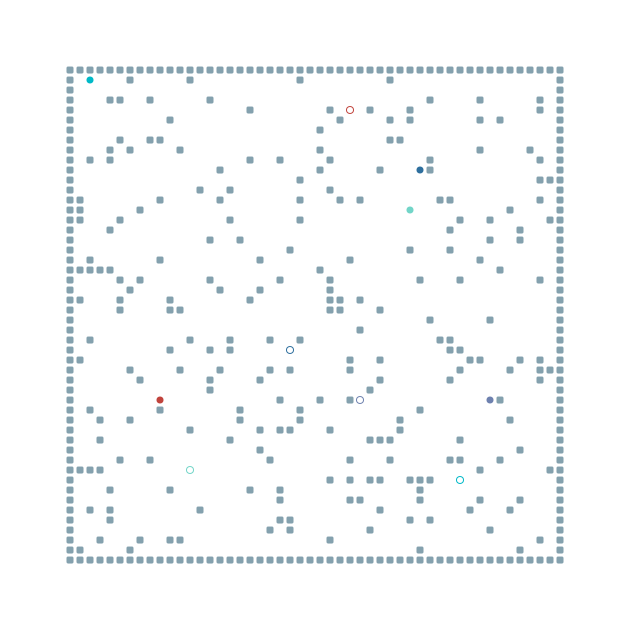

In [81]:
env.save_animation('renders/test.svg')
display(SVG('renders/test.svg'))

In [ ]:
%load_ext tensorboard
%tensorboard --logdir logs

### Default Maps

In [ ]:
from PIL import Image
import pandas as pd

In [ ]:
def image2grid(image_path: str) -> np.ndarray:
    image = Image.open(image_path).convert('L')
    threshold_value = 128
    binary_image = np.array(image) < threshold_value
    return list(binary_image.astype(int))


def test(env, agent, name: str = "") -> tuple[list, list, dict]:
    obs, info = env.reset()
    opt_paths = [[(ob['global_xy'])] + path for path, ob in zip(env.global_guidance, obs)]
    start = [[path[0][0] - env.obs_radius, path[0][1] - env.obs_radius] for path in opt_paths]
    finish = [[path[-1][0] - env.obs_radius, path[-1][1] - env.obs_radius] for path in opt_paths]
    terminated = truncated = [False, ...]
    timesteps = [0] * len(obs)
    scalars = {
        'moving_cost': [],
        'detour_percentage': [],
        'done': 0,
    }

    latest_obs = obs
    latest_info = info
    while not all(terminated) and not all(truncated):
        timesteps = [t + 1 for t in timesteps]
        actions = [agent.act(ob) if status['is_active'] else 0 for ob, status in zip(obs, info)]
        obs, reward, terminated, truncated, info = env.step(actions)
        for i in range(env.num_agents):
            if obs[i]['global_xy'] == latest_obs[i]['global_target_xy']:
                if (latest_info[i]['is_active'] and not info[i]['is_active']) or info[i]['is_active']:
                    if obs[i]['global_xy'] != latest_obs[i]['global_xy']:
                        scalars['moving_cost'].append(moving_cost(timesteps[i], opt_paths[i][0], opt_paths[i][-1]))
                        scalars['detour_percentage'].append(detour_percentage(timesteps[i], len(opt_paths[i]) - 1))
                        scalars['done'] += 1
                        if info[i]['is_active'] and obs[i]['global_xy'] != obs[i]['global_target_xy']:
                            opt_paths[i] = [obs[i]['global_xy']] + env.global_guidance[i]
                            timesteps[i] = 0
        latest_obs = obs
        latest_info = info

    env.save_animation(f'renders/{name}.svg')

    n = len(scalars['moving_cost'])
    scalars['moving_cost'] = sum(scalars['moving_cost']) / n if n > 0 else 0
    scalars['detour_percentage'] = sum(scalars['detour_percentage']) / n if n > 0 else 0
    return start, finish, scalars

In [ ]:
default_map_settings = {
    'random': {
        'size': 48,
        'num_agents': None,
        'density': None,
        'map': image2grid('data/empty-48-48-random-10_60_agents.png'),

    },
    'even': {
        'size': 48,
        'num_agents': None,
        'density': None,
        'map': image2grid('data/empty-48-48-even-10_60_agents.png'),
    }
}

In [ ]:
agent = G2RLAgent(
    model,
    action_space=5,
    epsilon=0,
    device=device)

results = {
    'map': [],
    'num_agents': [],
    'max_steps': [],
    'density': [],
    'size': [],
    'start': [],
    'final': [],
    'done': [],
    'detour_percentage': [],
    'moving_cost': [],
}

for map_name, map_value in default_map_settings.items():
    for num_agents in [3, 6, 12]:
        map_value['num_agents'] = num_agents
        for steps in [60, 120, 180]:
            env = G2RLEnv(**map_value, max_episode_steps=steps, on_target='finish')
            start, finish, scalars = test(env, agent, name=f'{map_name}_{num_agents}_{steps}')
            results['map'].append(map_name)
            results['num_agents'].append(num_agents)
            results['max_steps'].append(steps)
            results['done'].append(scalars['done'])
            results['detour_percentage'].append(scalars['detour_percentage'])
            results['moving_cost'].append(scalars['moving_cost'])
            results['start'].append(start)
            results['final'].append(finish)
            results['density'].append(map_value['density'])
            results['size'].append(map_value['size'])

stat = pd.DataFrame(data=results)

In [ ]:
stat

,map,num_agents,max_steps,density,size,start,final,done,detour_percentage,moving_cost
0,random,3,60,None,48,"[[25, 22], [17, 13], [22, 39]]","[[28, 26], [32, 16], [46, 32]]",2,0.000000,1.120072
1,random,3,120,None,48,"[[25, 22], [17, 13], [22, 39]]","[[28, 26], [32, 16], [46, 32]]",2,0.000000,1.120072
2,random,3,180,None,48,"[[25, 22], [17, 13], [22, 39]]","[[28, 26], [32, 16], [46, 32]]",2,0.000000,1.120072
3,random,6,60,None,48,"[[25, 22], [17, 13], [22, 39], [32, 36], [38, ...","[[28, 26], [32, 16], [46, 32], [28, 19], [33, ...",5,0.000000,1.141997
4,random,6,120,None,48,"[[25, 22], [17, 13], [22, 39], [32, 36], [38, ...","[[28, 26], [32, 16], [46, 32], [28, 19], [33, ...",5,0.000000,1.141997
5,random,6,180,None,48,"[[25, 22], [17, 13], [22, 39], [32, 36], [38, ...","[[28, 26], [32, 16], [46, 32], [28, 19], [33, ...",5,0.000000,1.141997
6,random,12,60,None,48,"[[25, 22], [17, 13], [22, 39], [32, 36], [38, ...","[[28, 26], [32, 16], [46, 32], [28, 19], [33, ...",9,1.915709,1.137863
7,random,12,120,None,48,"[[25, 22], [17, 13], [22, 39], [32, 36], [38, ...","[[28, 26], [32, 16], [46, 32], [28, 19], [33, ...",9,1.915709,1.137863
8,random,12,180,None,48,"[[25, 22], [17, 13], [22, 39], [32, 36], [38, ...","[[28, 26], [32, 16], [46, 32], [28, 19], [33, ...",9,1.915709,1.137863
9,even,3,60,None,48,"[[32, 25], [46, 10], [12, 4]]","[[6, 41], [45, 11], [28, 32]]",2,0.000000,1.000000


In [ ]:
stat.to_csv('data/default_statistics.csv', index=False)

### Different env modes

In [ ]:
on_target_ops = ['restart', 'finish', 'nothing']
collission_system_ops = ['priority', 'block_both', 'soft']

In [ ]:
for on_target in on_target_ops:
    for collission_system in collission_system_ops:
        env = G2RLEnv(
            **map_settings['free'],
            max_episode_steps=60,
            on_target=on_target,
            collission_system=collission_system)
        agent = G2RLAgent(
            model,
            action_space=5,
            epsilon=0,
            device=device,
            lifelong=on_target == 'restart')
        result = test(env, agent, name=f'free_{on_target}_{collission_system}')

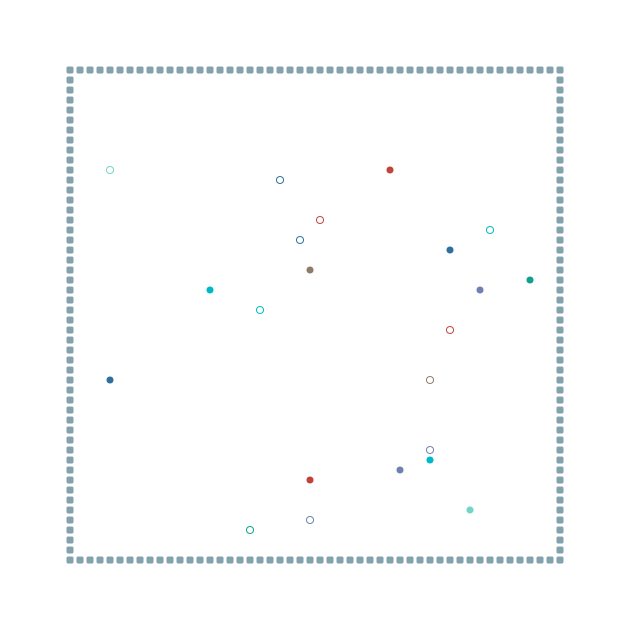

In [ ]:
display(SVG(f'renders/free_nothing_soft.svg'))